
 ****** random_scan Scan worm propagation: Run1******
Time steps: 100 ---- IPs_infected: 37
Time steps: 200 ---- IPs_infected: 451
Time steps: 300 ---- IPs_infected: 930
Time steps: 400 ---- IPs_infected: 996
Time steps: 431 ---- IPs_infected: 1000. 
All IPs infected!!!
[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 13, 13, 13, 13, 13, 14, 14, 15, 15, 16, 17, 17, 17, 19, 20, 21, 21, 21, 22, 22, 22, 24, 24, 24, 24, 24, 25, 27, 27, 27, 28, 31, 32, 33, 33, 34, 34, 35, 35, 36, 37, 38, 38, 39, 41, 42, 44, 46, 47, 47, 52, 55, 58, 59, 62, 62, 64, 65, 66, 67, 69, 69, 72, 72, 74, 75, 76, 78, 79, 80, 84, 85, 86, 89, 92, 92, 93, 93, 97, 103, 107, 110, 114, 117, 119, 122, 123, 127, 131, 140, 143, 149, 152, 157, 160, 163, 169, 179, 183, 185, 190, 194, 196, 202, 211, 218, 225, 235, 240, 242, 246, 253, 255, 260, 271, 277, 282, 287, 295, 299, 307, 314, 320, 3

No handles with labels found to put in legend.


Time steps: 500 ---- IPs_infected: 998
Time steps: 565 ---- IPs_infected: 1000. 
All IPs infected!!!
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 5, 5, 5, 5, 6, 6, 7, 7, 7, 7, 7, 8, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 14, 14, 14, 14, 14, 17, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 23, 23, 23, 24, 25, 25, 25, 27, 27, 28, 29, 30, 30, 30, 32, 32, 33, 33, 35, 38, 38, 40, 41, 42, 44, 45, 47, 49, 50, 51, 54, 54, 54, 57, 58, 61, 62, 64, 65, 68, 70, 74, 79, 80, 82, 82, 86, 87, 90, 91, 96, 98, 101, 103, 105, 110, 112, 116, 118, 119, 119, 123, 126, 131, 139, 140, 145, 148, 149, 155, 158, 160, 163, 167, 172, 174, 182, 190, 194, 200, 201, 206, 214, 216, 220, 227, 231, 236, 240, 249, 252, 257, 260, 268, 272, 281, 291, 

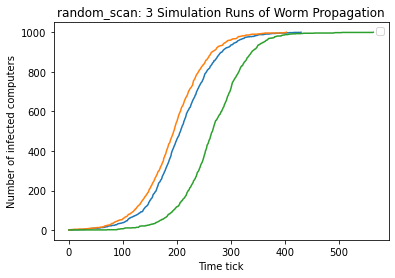

In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np


runs = 3
OMEGA = 100000
Total_vulnerable_ip = 1000
total_simulation_steps = 10000
SCAN_RATE = 3


def initialize_ip_address_state():
    ip_addr_space = ['immune' for i in range(OMEGA+1)]
    for i in range(int(1000/10)):
        for j in range(1, 11):
            ip_addr_space[j + (i * 1000)] = 'vulnerable'
    return ip_addr_space


def get_local_ips(ip_addr_state):
    local_ips = []
    for ip in range(OMEGA):
        if ip_addr_state[ip] == 'infected':
            for _ in range(SCAN_RATE):
                if ip <= 10:
                    rule = np.random.choice(['rule1', 'rule2'], 1, p=[0.8, 0.2])
                    if rule == 'rule1':
                        infect_ip = random.sample(range(1, ip + 1 + 10), 1)
                    elif rule == 'rule2':
                        infect_ip = random.sample(range(1, OMEGA + 1), 1)
                elif ip >= (OMEGA - 10):
                    rule = np.random.choice(['rule1', 'rule2'], 1, p=[0.8, 0.2])
                    if rule == 'rule1':
                        infect_ip = random.sample(range(ip - 10, OMEGA + 1), 1)
                    elif rule == 'rule2':
                        infect_ip = random.sample(range(1, OMEGA + 1), 1)
                else:
                    rule = np.random.choice(['rule1', 'rule2'], 1, p=[0.8, 0.2])
                    if rule == 'rule1':
                        infect_ip = random.sample(range(ip - 10, ip + 1 + 10), 1)
                    elif rule == 'rule2':
                        infect_ip = random.sample(range(1, OMEGA + 1), 1)
                local_ips.append(infect_ip[0])
    return local_ips


def worm_propagation(ip_addr_state, method):
    infected_ip_count_discrete = []
    num_of_infected_ip = 1
    for tick in range(total_simulation_steps):
        num_of_ips_to_scan = num_of_infected_ip * SCAN_RATE
        if method == 'random_scan':
            infected_ips = random.sample(range(1, OMEGA + 1), num_of_ips_to_scan)
        elif method == 'local_preference':
            infected_ips = get_local_ips(ip_addr_state)
        for ip in infected_ips:
            if ip_addr_state[ip] == 'vulnerable':
                ip_addr_state[ip] = 'infected'
                num_of_infected_ip += 1
                if num_of_infected_ip == Total_vulnerable_ip:
                    break

        if (tick + 1) % 100 == 0:
            print("Time steps: {0} ---- IPs_infected: {1}".format(tick + 1, num_of_infected_ip))
        infected_ip_count_discrete.append(num_of_infected_ip)
        if num_of_infected_ip == Total_vulnerable_ip:
            print("Time steps: {0} ---- IPs_infected: {1}. \nAll IPs infected!!!".format(tick + 1,
                                                                                              num_of_infected_ip))
            break
    return infected_ip_count_discrete


def plot_simulation(count, run):
    print(count)
    plt.plot(count, "-")


def worm_propagation_simulation(method, plot=False):
    for run in range(runs):
        print("\n ****** {} Scan worm propagation: Run{}******".format(method, run+1))
        ip_addr_state = initialize_ip_address_state()
        # print([i for i, x in enumerate(ip_addr_state) if x == 'immune'])
        ip_addr_state[1001] = 'infected'
        infected_ip_count_discrete = worm_propagation(ip_addr_state, method)
        if plot:
            plot_simulation(infected_ip_count_discrete, run)
    if plot:
        plt.xlabel("Time tick")
        plt.ylabel("Number of infected computers")
        plt.title("{}: 3 Simulation Runs of Worm Propagation".format(method))
        plt.legend()
        plt.show()


def main():
    random.seed(1)
    methods = ['random_scan']
    for method in methods:
        worm_propagation_simulation(method, plot=True)


main()